# Milestones 1

Ridhwan Muttaqien - HCK06

## URL Deployment

https://huggingface.co/spaces/Ridhwanm/h8dsft_P2M1_Ridhwan_Muttaqien

## Description & Objective

Seiring dengan meningkatnya pengakses internet di masyarakat, semakin banyak sektor kehidupan yang merambah ke dunia online. Tidak terkecuali sektor perdagangan atau jual beli. Ini bisa dibuktikan dengan tumbuh pesatnya situs-situs jual beli saat ini.

Jumlah situs jual beli yang begitu banyak dan saling berkompetisi satu sama lain membuat setiap perusahaan pemilik situs berusaha untuk menjaga loyalitas customer nya. Keadaan di mana seorang customer berhenti menggunakan suatu jasa suatu perusahaan disebut churn.

Dataset yang akan dianalisis adalah data customer yang mulai membuat akun di sebuah situs jual beli dari tahun 2015-2017. Berikut adalah kolom yang ada pada dataset :

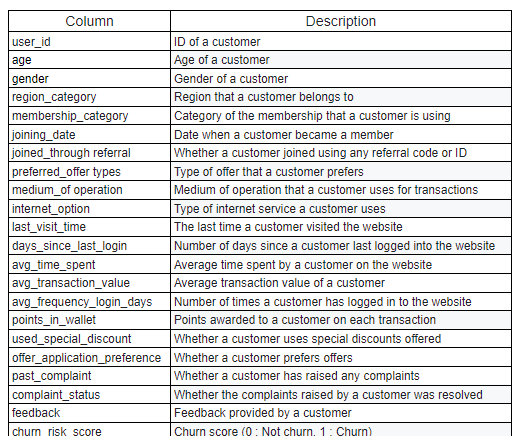

Untuk meminimalisir jumlah churn pada customer, perusahaan perlu membuat sebuah model yang bisa memprediksi apakah seorang customer akan menjadi churn atau tidak. Jika hasil prediksi model adalah churn maka perusahaan perlu melakukan langkah antisipasi agar customer tersebut tidak benar-benar menjadi churn di dunia nyata.

Dari dataset dapat dicek hal berikut :


1.   Apakah jenis membership berpengaruh terhadap akan atau tidaknya seorang customer menjadi churn?

2.   Bagaimana pengaruh feedback seorang customer terhadap status churn?

3.   Buruknya kualitas customer service bisa membuat customer memberi feedback negatif. Bagaimana status penanganan komplain dari customer service perusahaan?

4.   Bagaimana rata-rata transaksi customer berdasarkan churn status?

5.   Apakah adanya diskon spesial dapat mencegah customer agar tidak churn?

6.   Dari perangkat apa saja customer mengakses website perusahaan?

## Libraries Importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install phik
import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

!pip install feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

np.random.seed(50)
tf.random.set_seed(50)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.5 MB/s eta 0:00:00


## Exploratory Data Analysis

In [4]:
# loading data dari google drive dan menampilkan dataframe

df = pd.read_csv('churn.csv')
pd.set_option("display.max.columns", None)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [5]:
# mengecek data duplikat

df.duplicated().sum()

18

In [6]:
# menghapus data duplikat & mengecek apakah sudah terhapus atau belum

df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

In [8]:
# overview data dengan representasi numerik

df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


- Kolom age terdistribusi normal karena nilai mean dan median nya dekat
- Mayoritas pengunjung website berkisar pada usia 21 - 53
- Terdapat data anomali pada kolom 'days_since_last_login', dimana nilai minimum nya bernilai negatif, sedangkan kolom ini menerangkan jumlah hari yang tidak mungkin bernilai negatif. Perlu dicek lebih lanjut jumlahnya untuk kemudian diputuskan apakah akan di replace dengan nilai tertentu atau di drop
- Kolom 'avg_time_spent' dan 'avg_transaction_value' terdistribusi right skewed karena nilai mean lebih besar dari mediannya
- Kolom 'avg_frequency_login_days' terdistribusi normal karena nilai mean dan mediannya dekat
- Frekuensi customer login ke website  mayoritas berkisar di rentang 5 - 24 kali
- Kolom 'points_in_wallet' terdistribusi left skewed karena mean nya lebih kecil dari median
- Kolom 'churn_risk_score' adalah kolom kategorikal walaupun direpresentasikan dalam bentuk numerik, ini terlihat dimana nilai minimum nya adalah 0 dan nilai maksimumnya adalah 1
- Kolom 'avg_time_spent' dan 'avg_frequency_login_days' memiliki nilai minimum 0 tetapi pada kolom 'avg_transaction_value' mempunyai nilai tidak 0. Secara logika ini agak aneh karena ketika customer tidak mengakses website dan tidak pernah login maka seharusnya mereka tidak memiliki nilai transaksi. Jika kita drop maka kita perlu mengecek jumlah data tersebut dibandingkan jumlah data awal

In [9]:
df[(df['avg_time_spent']==0)|(df['avg_frequency_login_days']==0)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.040000,Yes,No,No,Not Applicable,Poor Product Quality,0
11,b0f326ec9cd4d05c,33,M,Town,Platinum Membership,2016-08-06,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,00:25:22,11,74.38,23695.52,0.0,832.420000,Yes,No,Yes,Unsolved,Reasonable Price,0
20,810e636913180dff,27,M,City,Platinum Membership,2017-02-27,No,Without Offers,Desktop,Mobile_Data,06:12:50,10,0.00,49231.43,15.0,738.640000,No,Yes,No,Not Applicable,Too many ads,0
23,a401999adf27e11f,49,M,Town,Basic Membership,2017-11-25,Yes,Without Offers,Desktop,Fiber_Optic,08:51:53,19,76.55,11869.96,0.0,545.880000,Yes,No,Yes,No Information Available,No reason specified,1
26,848171b9a43e3b26,59,M,Town,Silver Membership,2015-01-07,Yes,Credit/Debit Card Offers,NaN,Wi-Fi,22:28:29,12,615.63,7804.47,0.0,455.553206,Yes,No,Yes,No Information Available,Poor Customer Service,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36969,916384675e8353ed,26,F,Town,Platinum Membership,2016-08-19,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,11:39:52,6,408.80,36397.46,0.0,773.450000,Yes,No,No,Not Applicable,User Friendly Website,0
36982,abd6e6c7d9d3ee7d,63,M,City,No Membership,2017-10-23,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,18:53:43,11,213.24,12017.20,0.0,529.820000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
36986,a0b75e9ebf4adbb3,12,F,Town,Basic Membership,2017-10-23,Yes,Credit/Debit Card Offers,Both,Fiber_Optic,23:37:06,23,316.68,18473.94,0.0,672.830000,Yes,No,Yes,Solved,Poor Customer Service,1
36990,b761580853d7c376,12,M,City,Gold Membership,2015-09-18,No,Without Offers,Desktop,Mobile_Data,20:21:40,6,0.00,1779.94,7.0,0.000000,No,Yes,No,Not Applicable,Poor Customer Service,1


In [10]:
df[(df['avg_time_spent']==0)|(df['avg_frequency_login_days']==0)].shape[0]/ df.shape[0]

0.1540333044982699

Terlihat jumlah baris dengan rata-rata waktu akses website atau frekuensi login =0, yaitu 15% dari data total. Jumlah ini terlalu banyak untuk didrop. Kita bisa mengecek korelasi kolom tersebut dengan kolom target di tahap selanjutnya. Jika ternyata korelasinya tidak besar terhadap target maka kita tidak perlu melakukan drop karena memang tidak akan digunakan di permodelan

In [11]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

terdapat missing value pada kolom 'gender', 'region_category', 'joined_through_referral',	'preferred_offer_types', dan 'medium_of_operation'. Handling missing value akan dilakukan di tahap selanjutnya.

In [12]:
# mengecek waktu paling awal dari dataset

df['joining_date'].min()

'2015-01-01'

In [13]:
# mengecek waktu paling akhir dari dataset

df['joining_date'].max()

'2017-12-31'

`Data berisi customer yang join atau membuat akun di website di tahun 2015 - 2017`

In [14]:
# menghitung jumlah customer yang membuat akun di tahun 2015

join2015 = df[(df['joining_date']>='2015-01-01')&(df['joining_date']<='2015-12-31')]
join2015['user_id'].count()

12297

In [15]:
# menghitung jumlah customer yang membuat akun di tahun 2016

join2016 = df[(df['joining_date']>='2016-01-01')&(df['joining_date']<='2016-12-31')]
join2016['user_id'].count()

12155

In [16]:
# menghitung jumlah customer yang membuat akun di tahun 2017

join2017 = df[(df['joining_date']>='2017-01-01')&(df['joining_date']<='2017-12-31')]
join2017['user_id'].count()

12540

`Pertumbuhan customer baru bisa dikatakan stabil terlihat tiap tahun dari 2015 - 2017 terdapat customer yang membuat akun baru berkisar di angka 12000`

### 1. Apakah jenis membership berpengaruh terhadap akan atau tidaknya seorang customer menjadi churn?

In [17]:
# membuat grouping berdasarkan status churn terhadap kolom membership

a= df.groupby('churn_risk_score', as_index=False)['membership_category'].value_counts()
a

,churn_risk_score,membership_category,count
0,0,Premium Membership,4455
1,0,Platinum Membership,4338
2,0,Gold Membership,4282
3,0,Silver Membership,3428
4,0,Basic Membership,251
5,0,No Membership,226
6,1,Basic Membership,7473
7,1,No Membership,7466
8,1,Silver Membership,2560
9,1,Gold Membership,2513


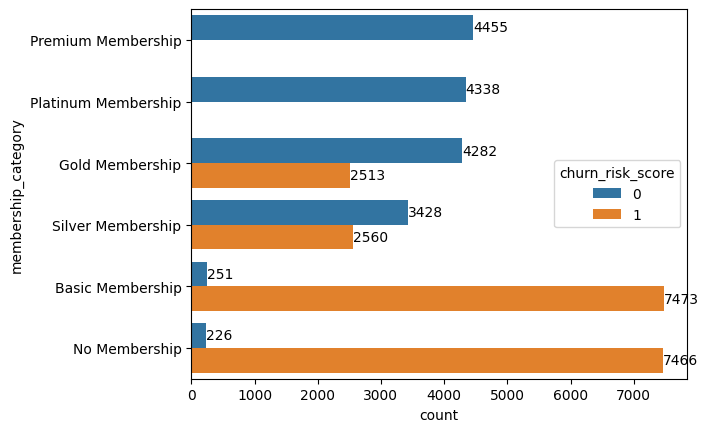

In [18]:
# menampilkan visualisasi jumlah tiap jenis membership berdasarkan kondisi churn atau tidak

g = sns.barplot(data=a, y='membership_category', x='count', hue='churn_risk_score')

for i in g.containers:
  plt.bar_label(i)

- Terlihat dari hasil visualisasi bahwa customer churn mayoritas tidak menjadi member dan kalaupun menjadi member jenisnya adalah basic membership. Bisa disimpulkan bahwa seorang customer dengan basic membership atau bahkan tidak menjadi member memiliki potensi yang lebih besar untuk menjadi churn.

- Kita bisa mengatasi hal tersebut dengan berusaha menawarkan customer untuk menjadi member dengan tingkat yang lebih tinggi (silver sampai premium)

- Di sini juga terlihat jumlah customer yang tidak menjadi member masih tinggi, maka kita perlu mengevaluasi kinerja tim marketing dalam menawarkan membership pada cutomer atau mengevaluasi paket benefit membership itu sendiri, apakah sudah menarik bagi customer atau belum

### 2. Bagaimana pengaruh feedback seorang customer terhadap status churn?

In [19]:
# melakukan grouping berdasarkan status churn terhadap kolom feedback

b= df.groupby('churn_risk_score', as_index=False)['feedback'].value_counts()
b

,churn_risk_score,feedback,count
0,0,Too many ads,2342
1,0,Poor Website,2309
2,0,No reason specified,2296
3,0,Poor Customer Service,2260
4,0,Poor Product Quality,2223
5,0,Reasonable Price,1417
6,0,User Friendly Website,1391
7,0,Products always in Stock,1382
8,0,Quality Customer Care,1360
9,1,Poor Product Quality,4127


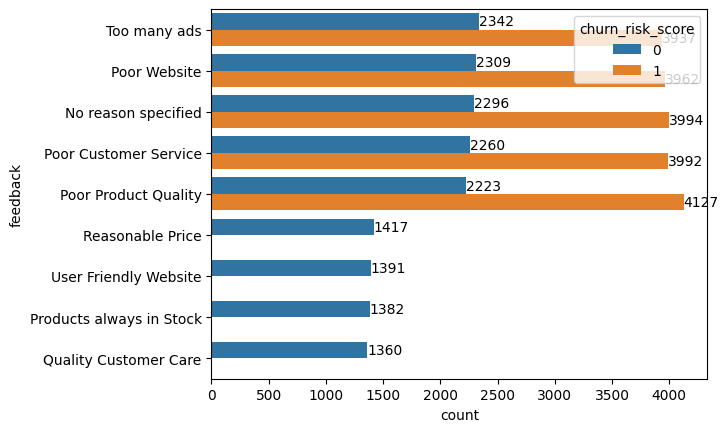

In [20]:
# menampilkan visualisasi jumlah tiap kategori feedback berdasarkan status churn atau tidak

g = sns.barplot(data=b, y='feedback', x='count', hue='churn_risk_score')

for i in g.containers:
  plt.bar_label(i)

- Terlihat dari diagram, ketika customer memberikan feedback negatif pada perusahaan maka customer lebih berpotensi menjadi churn.

- Terlihat pada label 1(churn), ada 2 feedback negatif berkaitan dengan website perusahaan yaitu 'Too many ads' dan 'Poor Website'. Ini perlu menjadi perhatian buat tim front end terkait dengan pengalaman seorang customer ketika berinteraksi dengan website perusahaan.

### 3. Buruknya kualitas customer service bisa membuat customer memberi feedback negatif. Bagaimana status penanganan komplain dari customer service perusahaan?

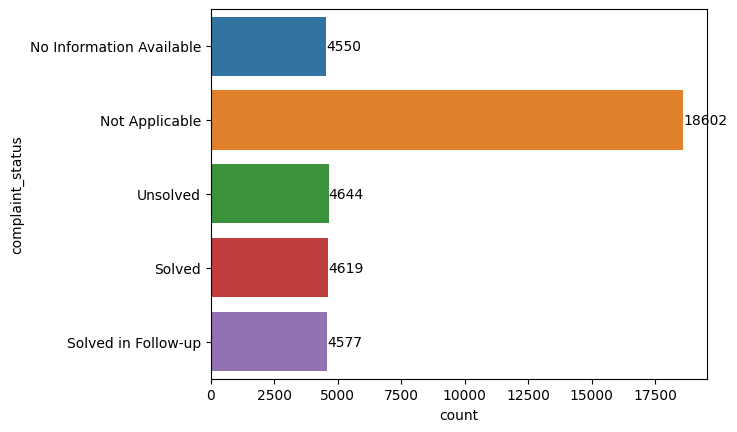

In [21]:
g = sns.countplot(data=df, y='complaint_status')

for i in g.containers:
  plt.bar_label(i)

- Mayoritas customer tidak pernah melakukan komplain. Bisa disimpulkan bahwa pernah atau tidaknya customer komplain tidak mempengaruhi jumlah churn

- Masih terdapat komplain tanpa keterangan yaitu 'No Information Available'. Ini bisa menjadi catatan bagi tim customer service untuk lebih memperhatikan pencatatan komplain customer. Ketika seorang customer melakukan komplain dan dilayani oleh customer service, kita harus mengetahui apakah status komplain tersebut teratasi atau tidak. Customer service bisa mengontak ulang customer untuk memastikan hal tersebut.

### 4. Bagaimana rata-rata transaksi customer berdasarkan churn status?

<Axes: xlabel='avg_transaction_value', ylabel='Count'>

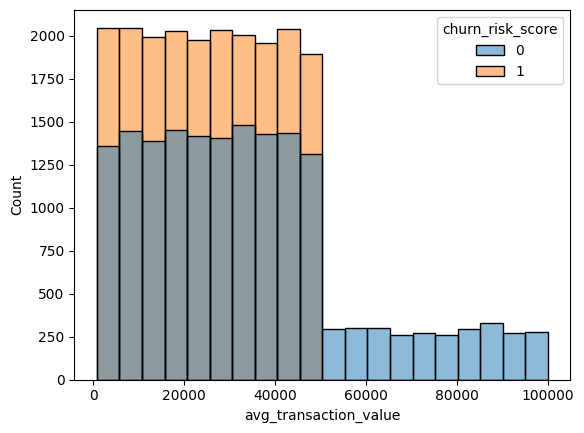

In [22]:
# menampilkan visualisasi sebaran data dari rata-rata besaran transaksi antara yang churn dan tidak

sns.histplot(data=df, x='avg_transaction_value', bins=20, hue='churn_risk_score')

- Rata-rata besaran transaksi customer churn berkisar di angka 0 - 50000. Bisa dikatakan bahwa cutomer churn tidak banyak membeli barang dengan harga yang mahal di website

### 5. Apakah adanya diskon spesial dapat mencegah customer agar tidak churn?

<Axes: ylabel='used_special_discount'>

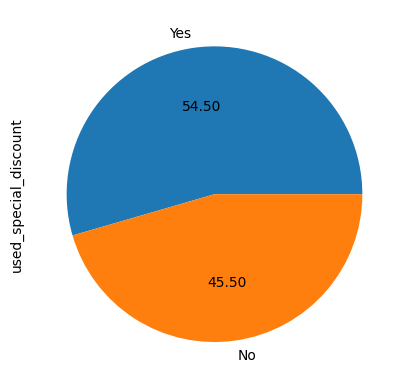

In [23]:
df_churn = df[df['churn_risk_score']==1]
df_churn['used_special_discount'].value_counts().plot(kind='pie',autopct='%.2f')

- 54% customer churn menggunakan diskon spesial. Ini berarti tawaran diskon spesial yang kita berikan belum efektif untuk mencegah customer untuk churn

### 6. Dari perangkat apa saja customer mengakses website perusahaan?

<Axes: ylabel='medium_of_operation'>

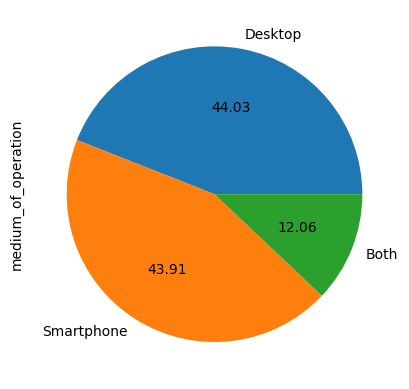

In [24]:
df['medium_of_operation'].value_counts().plot(kind='pie',autopct='%.2f')

- Berdasarkan visualisasi terlihat customer mengakses website dengan menggunakan desktop, smartphone, ataupun keduanya.

- Jika menjumlahkan antara pengakses dengan smartphone dan pengakses dengan kedua perangkat (desktop dan smartphone), maka dia menjadi mayoritas yaitu 55.97%. Ini bisa menjadi pertimbangan bagi manajemen untuk mengembangkan aplikasi mobile buat customer

## Data Preprocessing (Feature Engineering)

### Features Selection

<ipython-input-25-9b1bb23c9687>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


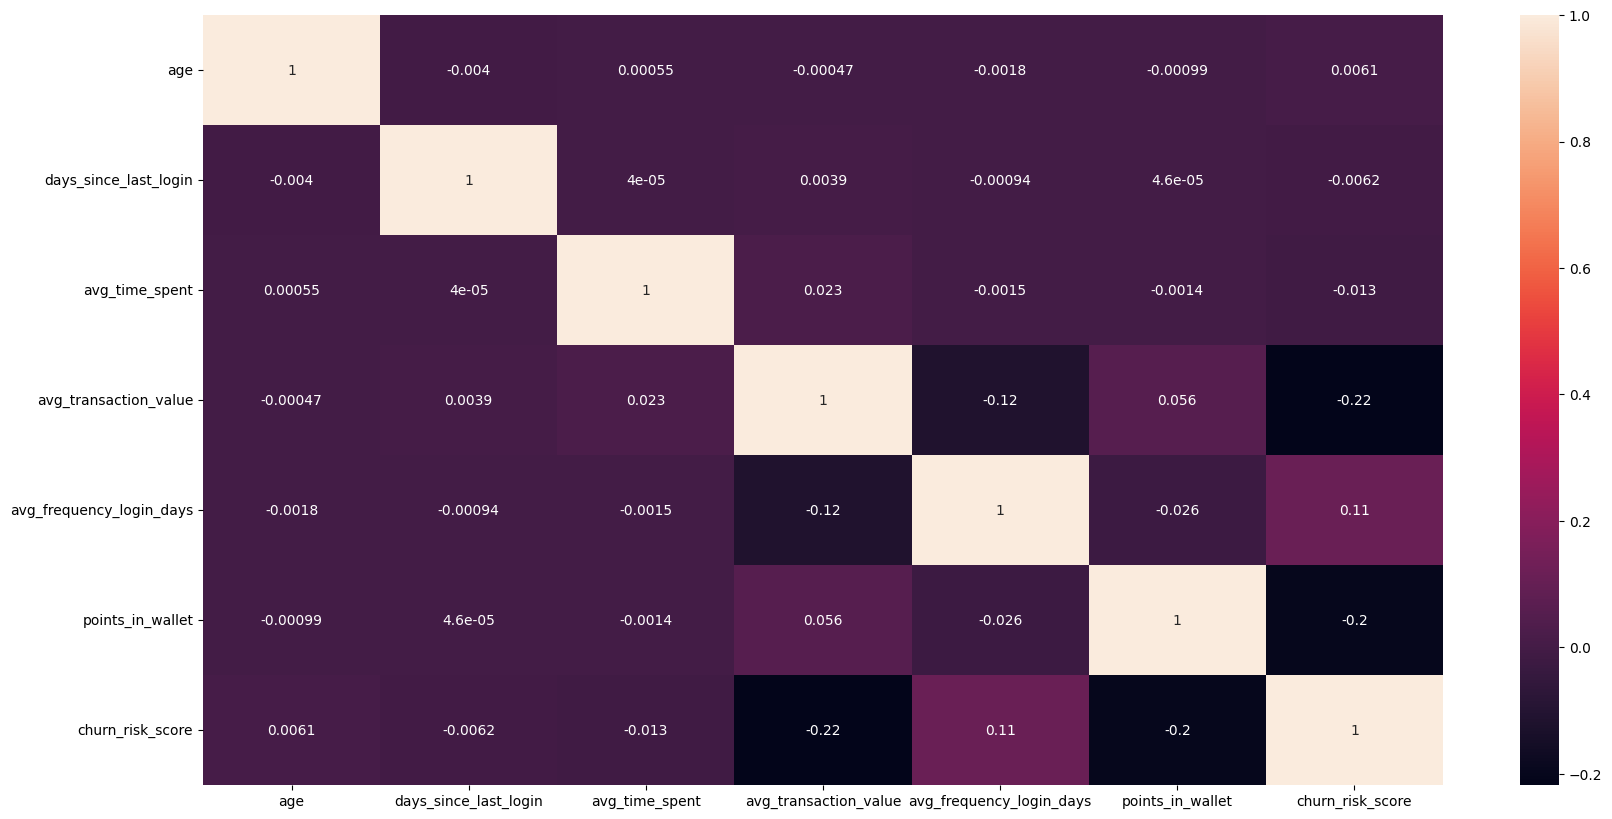

In [25]:
# mengecek korelasi kolom dengan representasi numerik terhadap target dan menampilkannya dalam heatmap

fig,ax = plt.subplots(figsize=[20,10])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Berdasarkan hasil heatmap terlihat hanya 3 kolom yang memiliki korelasi cukup besar dengan target yaitu 'avg_transaction_value','avg_frequency_login_days', dan	'points_in_wallet'. Karena threshold yang akan digunakan adalah 0.2 maka hanya kolom 'avg_transaction_value' dan 'points_in_wallet' yang akan digunakan sebagai feature

interval columns not set, guessing: ['churn_risk_score']


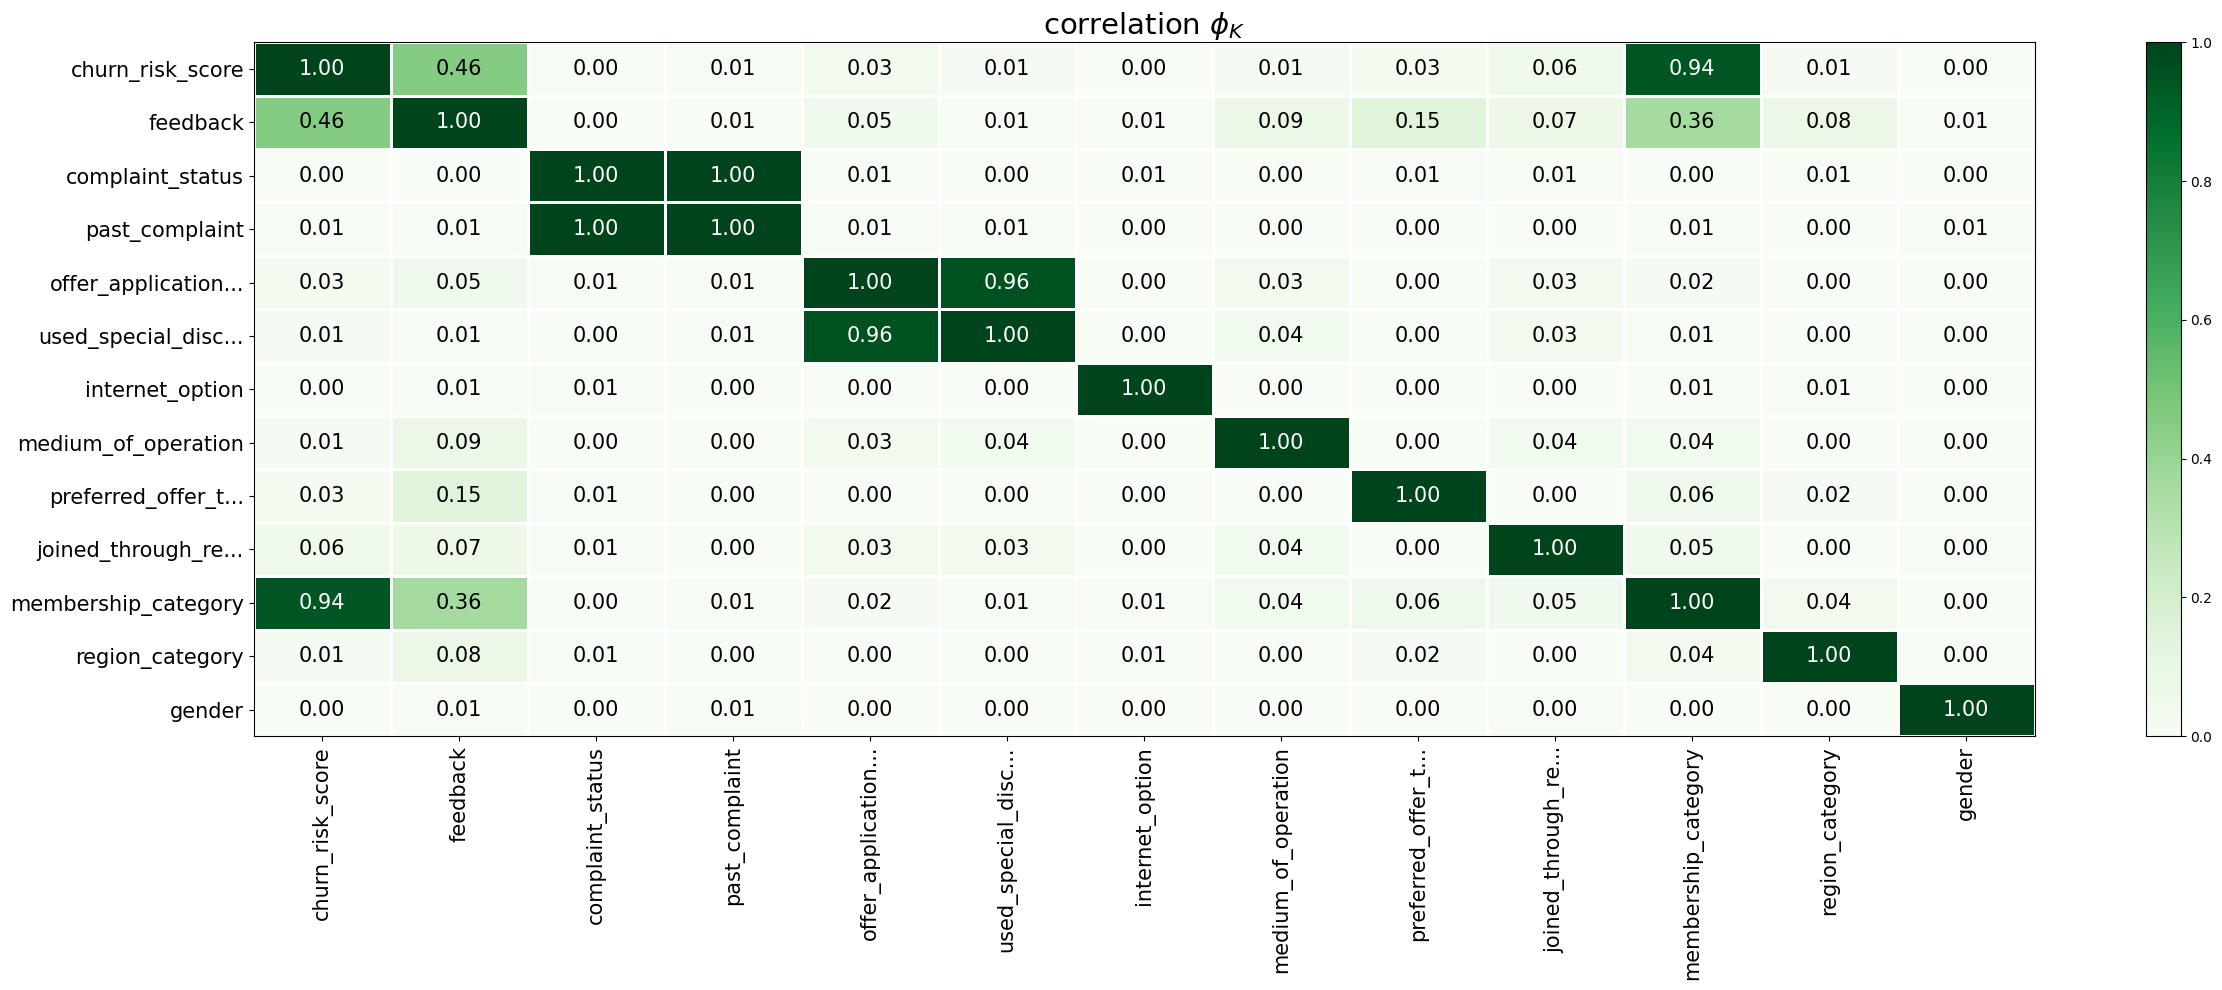

In [26]:
phik_overview = df[['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option',
                    'used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback','churn_risk_score']].phik_matrix()
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(25, 10))
plt.tight_layout()

Berdasarkan hasil phik correlation maka kolom kategorik yang akan digunakan sebagai feature adalah 'feedback' dan 'membership_category'

In [27]:
# membuat dataframe yang hanya berisi feature dan target

df_model = df[['avg_transaction_value','points_in_wallet','membership_category','feedback','churn_risk_score']]
df_model

,avg_transaction_value,points_in_wallet,membership_category,feedback,churn_risk_score
0,38604.69,627.48,No Membership,Poor Website,1
1,7665.66,575.97,Basic Membership,Poor Customer Service,1
2,37671.69,767.93,Silver Membership,Too many ads,0
3,15678.14,590.22,No Membership,Too many ads,1
4,8422.68,722.04,Silver Membership,Poor Product Quality,0
...,...,...,...,...,...
37005,29455.29,846.52,Gold Membership,User Friendly Website,0
37006,27038.47,835.98,Gold Membership,Reasonable Price,0
37007,39305.35,714.90,Gold Membership,Poor Customer Service,0
37008,46108.73,744.99,Gold Membership,Poor Website,0


### Data Splitting

#### For Data Inference

In [28]:
# memisahkan data yang akan digunakan untuk model inference di akhir

df_inf = df_model.sample(10, random_state=34)
df_inf

,avg_transaction_value,points_in_wallet,membership_category,feedback,churn_risk_score
27395,45030.15,620.140000,No Membership,Poor Customer Service,1
15689,38243.59,692.870000,No Membership,No reason specified,1
27316,23176.72,674.080000,Basic Membership,No reason specified,1
15159,6846.24,301.314265,Basic Membership,Poor Website,1
28730,23425.70,709.790000,Premium Membership,User Friendly Website,0
15417,18876.52,706.680000,Silver Membership,Too many ads,0
4972,24139.82,750.730000,Platinum Membership,Poor Product Quality,0
24214,42001.80,840.130000,Platinum Membership,User Friendly Website,0
1267,69495.40,792.790000,Premium Membership,Quality Customer Care,0
17290,18252.15,708.400000,Premium Membership,Reasonable Price,0


In [29]:
# membuang semua baris dengan indeks yang sama dengan data inference yang disampling sebelumnya

df_model_raw = df_model.drop(df_inf.index)
df_model_raw

,avg_transaction_value,points_in_wallet,membership_category,feedback,churn_risk_score
0,38604.69,627.48,No Membership,Poor Website,1
1,7665.66,575.97,Basic Membership,Poor Customer Service,1
2,37671.69,767.93,Silver Membership,Too many ads,0
3,15678.14,590.22,No Membership,Too many ads,1
4,8422.68,722.04,Silver Membership,Poor Product Quality,0
...,...,...,...,...,...
37005,29455.29,846.52,Gold Membership,User Friendly Website,0
37006,27038.47,835.98,Gold Membership,Reasonable Price,0
37007,39305.35,714.90,Gold Membership,Poor Customer Service,0
37008,46108.73,744.99,Gold Membership,Poor Website,0


In [30]:
# merapikan index data inference

df_inf.reset_index(drop=True, inplace=True)
df_inf

,avg_transaction_value,points_in_wallet,membership_category,feedback,churn_risk_score
0,45030.15,620.140000,No Membership,Poor Customer Service,1
1,38243.59,692.870000,No Membership,No reason specified,1
2,23176.72,674.080000,Basic Membership,No reason specified,1
3,6846.24,301.314265,Basic Membership,Poor Website,1
4,23425.70,709.790000,Premium Membership,User Friendly Website,0
5,18876.52,706.680000,Silver Membership,Too many ads,0
6,24139.82,750.730000,Platinum Membership,Poor Product Quality,0
7,42001.80,840.130000,Platinum Membership,User Friendly Website,0
8,69495.40,792.790000,Premium Membership,Quality Customer Care,0
9,18252.15,708.400000,Premium Membership,Reasonable Price,0


In [31]:
df_inf.to_csv('data_inf.csv')

#### For Train, Validation, and Test

In [32]:
# memisahkan antara data feature dan target

x= df_model_raw.drop('churn_risk_score',axis=1)
y= df_model_raw['churn_risk_score']

# memisahkan antara data train dan data test

x_train_full, x_test, y_train_full, y_test = train_test_split(x,y, random_state=0, test_size=0.3, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full, random_state=0, test_size=0.3, stratify=y_train_full)

In [33]:
x_train.shape

(18120, 4)

### Handling Outliers & Feature Scaling in pipeline

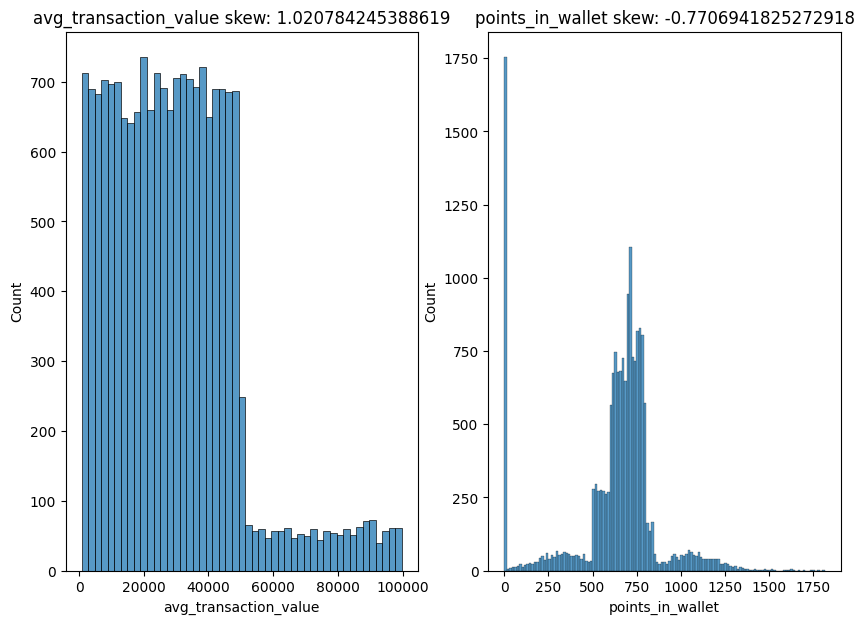

In [34]:
# menentukan kolom numerik dari dataset model

num_cols = ['avg_transaction_value', 'points_in_wallet']

# menampilkan distribusi data kolom numerik

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[10,7])
ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(x_train[col], ax=ax[idx])
    ax[idx].set_title(f'{num_cols[idx]} skew: {x_train[col].skew()}')

- Kolom avg_transaction_value terdistribusi right skewed

- kolom points_in_wallet terdistribusi left skewed. Jika kita lihat grafik, ini disebabkan banyaknya customer dengan jumlah poin 0 di points_in_wallet

In [35]:
# handling outlier dengan capping fold=3 karena extreme skewed

wins_exskew = Winsorizer(capping_method='iqr', tail='both', fold=3,
                  variables=['avg_transaction_value'], missing_values='ignore')
x_train = wins_exskew.fit_transform(x_train)

# handling outlier dengan capping fold=1.5 karena moderate skewed

wins_modskew = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                  variables=['points_in_wallet'], missing_values='ignore')
x_train = wins_modskew.fit_transform(x_train)

In [36]:
# membuat pipeline untuk handling outliers dengan capping

outlier_pipe = Pipeline([('outlier1', wins_exskew),
                         ('outlier2', wins_modskew)])

In [37]:
# membuat pipeline untuk kolom numerik terdiri dari handling outlier dan scaler

num_pipeline = Pipeline([('outlier', outlier_pipe),
                         ('scaler', MinMaxScaler())])

### Feature Encoding

In [38]:
# membuat pipeline untuk kolom kategorik

cat_ord = ['membership_category']
cat_ohe = ['feedback']
member = ['No Membership','Basic Membership','Premium Membership','Silver Membership','Gold Membership','Platinum Membership']
enc = OrdinalEncoder(categories=[member])

enc_2 = OneHotEncoder(sparse=False)

cat_ord_pipe= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_enc', enc)])
cat_ohe_pipe= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe_enc', enc_2)])

- Kolom membership di encode dengan ordinal karena memiliki urutan

- Kolom feedback di encode dengan one hot karena tidak memiliki urutan

In [39]:
# membuat pipeline gabungan antara kolom numerik dan kolom kategorik

preprocess_pipe = ColumnTransformer([
        ('numerik', num_pipeline, num_cols),
        ('ordinal', cat_ord_pipe, cat_ord),
        ('ohe', cat_ohe_pipe, cat_ohe)])

In [40]:
# melakukan transform pada data train, validasi, dan test

x_train_final = preprocess_pipe.fit_transform(x_train)
x_test_final = preprocess_pipe.transform(x_test)
x_val_final = preprocess_pipe.transform(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## ETL

In [41]:
x_train_final

array([[0.15379739, 0.5239771 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.80081619, 0.62200336, 4.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45259538, 0.53237037, 4.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34002892, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1236219 , 0.58016005, 4.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06534137, 0.41567113, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [42]:
x_train_final.shape

(18120, 12)

In [43]:
y_train.shape

(18120,)

In [44]:
# membuat pipeline tensorflow

training_batches = tf.data.Dataset.from_tensor_slices((x_train_final, y_train)).shuffle(x_train_final.shape[0]).batch(32)
validation_batches = tf.data.Dataset.from_tensor_slices((x_val_final, y_val)).shuffle(x_val_final.shape[0]).batch(32)

## Model

### 1. Sequential API

In [45]:
x_train_final.shape[1:]

(12,)

In [46]:
# membuat arsitektur model sequential

ann = Sequential()
ann.add(Dense(units=30, activation='relu',input_shape=(x_train_final.shape[1:])))
ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- membuat arsitektur model sequential API memakai 1 layer dengan jumlah neuron 30

- menggunakan activation sigmoid karena data target adalah kategorik dengan 2 kelas / biner

- menggunakan loss = binary_crossentropy karena data target biner

- menggunakan metrics accuracy karena data target balance

In [68]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [47]:
# melakukan proses training pada model

batch=32

history_ann_seq= ann.fit(training_batches,
                         validation_data= (validation_batches),
                         batch_size= batch,
                         epochs= 100
                         )

Epoch 1/100
567/567 [==============================] - 6s 8ms/step - loss: 0.4475 - accuracy: 0.7668 - val_loss: 0.3712 - val_accuracy: 0.7738
Epoch 2/100
567/567 [==============================] - 3s 4ms/step - loss: 0.3566 - accuracy: 0.7901 - val_loss: 0.3497 - val_accuracy: 0.8288
Epoch 3/100
567/567 [==============================] - 3s 5ms/step - loss: 0.3440 - accuracy: 0.8311 - val_loss: 0.3424 - val_accuracy: 0.8249
Epoch 4/100
567/567 [==============================] - 3s 5ms/step - loss: 0.3377 - accuracy: 0.8368 - val_loss: 0.3352 - val_accuracy: 0.8366
Epoch 5/100
567/567 [==============================] - 4s 6ms/step - loss: 0.3324 - accuracy: 0.8373 - val_loss: 0.3305 - val_accuracy: 0.8367
Epoch 6/100
567/567 [==============================] - 5s 8ms/step - loss: 0.3278 - accuracy: 0.8375 - val_loss: 0.3254 - val_accuracy: 0.8376
Epoch 7/100
567/567 [==============================] - 3s 4ms/step - loss: 0.3233 - accuracy: 0.8384 - val_loss: 0.3215 - val_accuracy: 0.8427

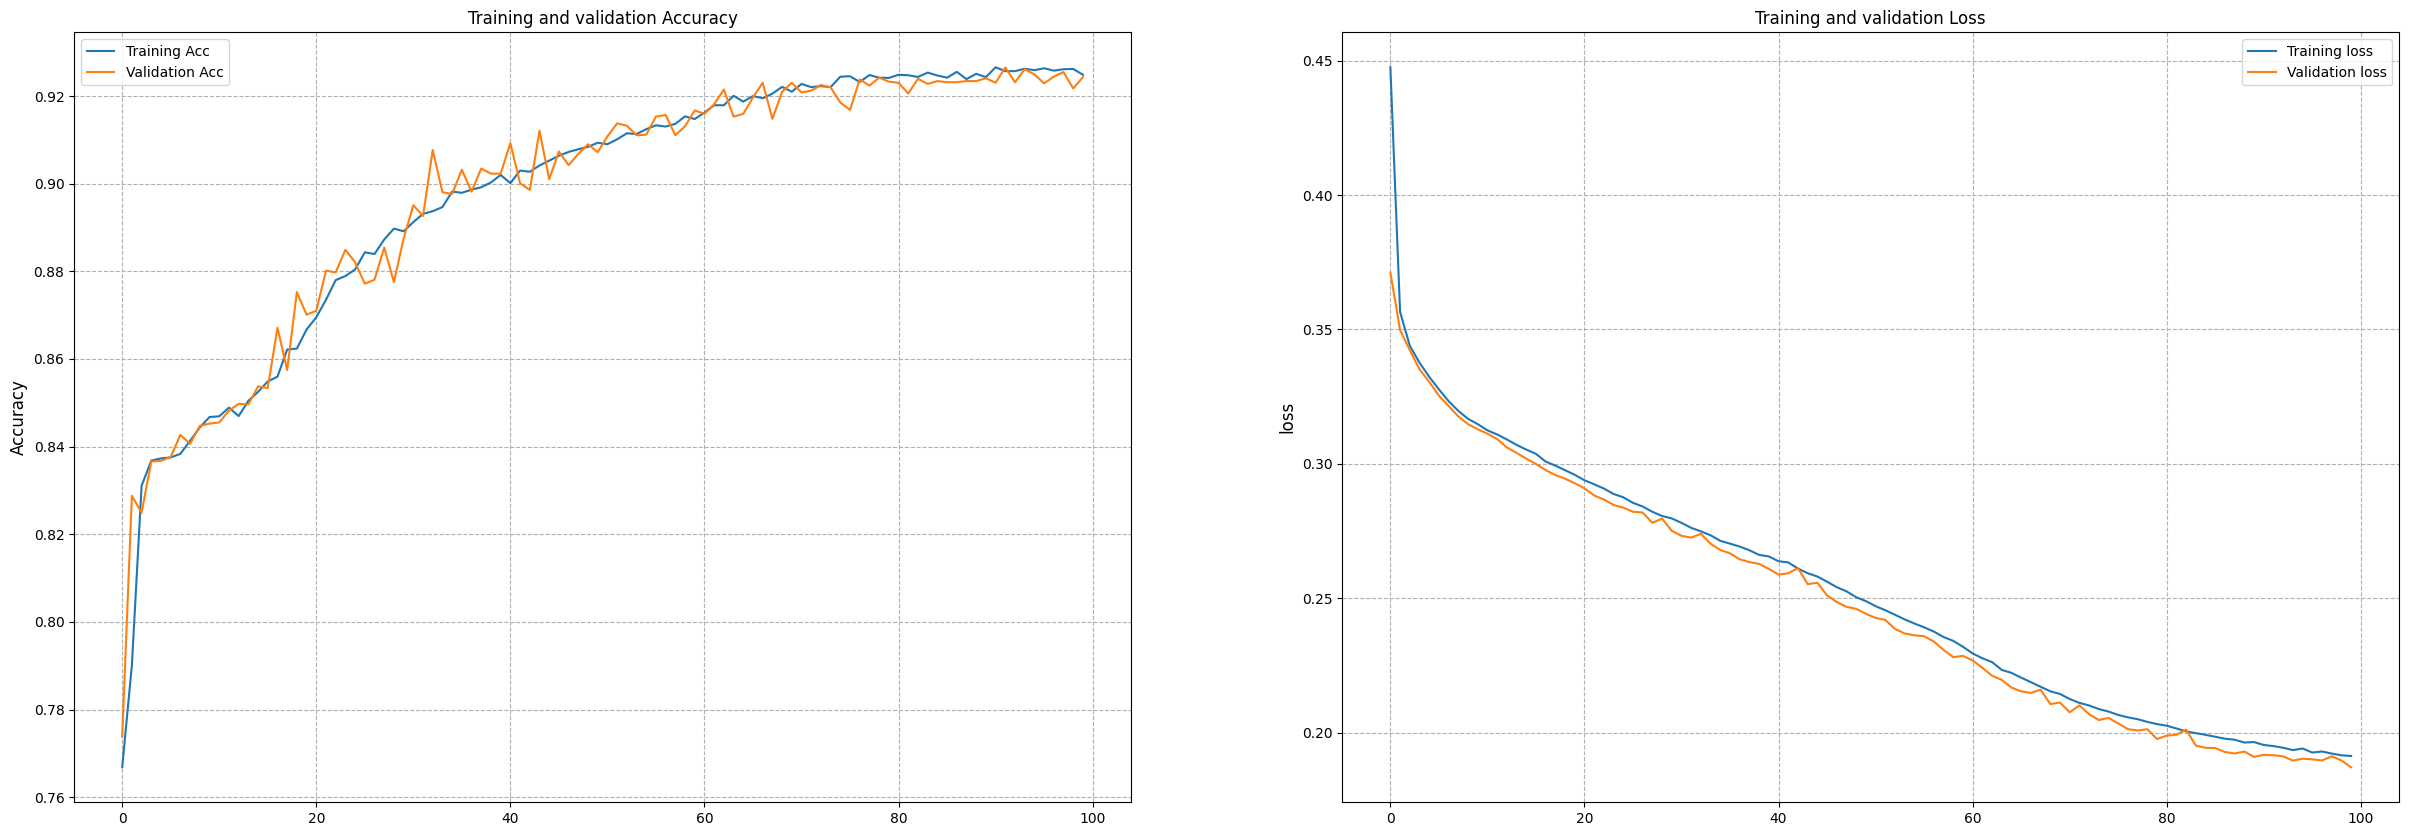

In [48]:
# visualisasi hasil training pada data train & validasi (accuracy & loss)

fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_seq.history['accuracy'], label='Training Acc')
plt.plot(history_ann_seq.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_seq.history['loss'], label='Training loss')
plt.plot(history_ann_seq.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

- Tidak overfitting karena grafik data train dan validation membentuk jarak yang kecil
- tidak terjadi vanishing pada model
- terlihat seperti ada explode tetapi jika kita perhatikan skala nilai akurasinya maka bisa diabaikan karena lonjakan kenaikannya kecil

In [49]:
# melakukan prediksi pada data test dan menampilkan nilai akurasi & loss

test_results= ann.evaluate(x_test_final,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

347/347 [==============================] - 1s 1ms/step - loss: 0.1948 - accuracy: 0.9264
Test loss: 0.1948
Test Accuracy: 0.9264


### 2. Functional API

In [50]:
# membuat arsitektur model fuctional
input_layer= tf.keras.Input(shape=(x_train_final.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- membuat model dengan 3 hidden layer. hidden layer1 dengan 30 neuron, hidden layer2 dengan 30 neuron, dan hidden layer3 dengan 10 neauron

- menggunakan activation sigmoid karena data target adalah kategorik dengan 2 kelas / biner

- menggunakan loss = binary_crossentropy karena data target biner

- menggunakan metrics accuracy karena data target balance

In [69]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 12)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 30)           390         ['input_layer[0][0]']            
                                                                                                  
 hidden_2 (Dense)               (None, 30)           930         ['hidden_1[0][0]']               
                                                                                                  
 hidden_3 (Dense)               (None, 10)           310         ['hidden_2[0][0]']               
                                                                                              

In [51]:
# melakukan training pada model

batch=32

history_ann_func= model_func.fit(training_batches,
                        validation_data= (validation_batches),
                         batch_size= batch,
                         epochs= 100)

Epoch 1/100
567/567 [==============================] - 3s 3ms/step - loss: 0.4029 - accuracy: 0.7922 - val_loss: 0.3264 - val_accuracy: 0.8366
Epoch 2/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3202 - accuracy: 0.8430 - val_loss: 0.3156 - val_accuracy: 0.8429
Epoch 3/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3049 - accuracy: 0.8485 - val_loss: 0.2950 - val_accuracy: 0.8452
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.3058 - val_accuracy: 0.8413
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.8670 - val_loss: 0.2671 - val_accuracy: 0.8812
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.8718 - val_loss: 0.2607 - val_accuracy: 0.8670
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: 0.2631 - accuracy: 0.8719 - val_loss: 0.2541 - val_accuracy: 0.8795

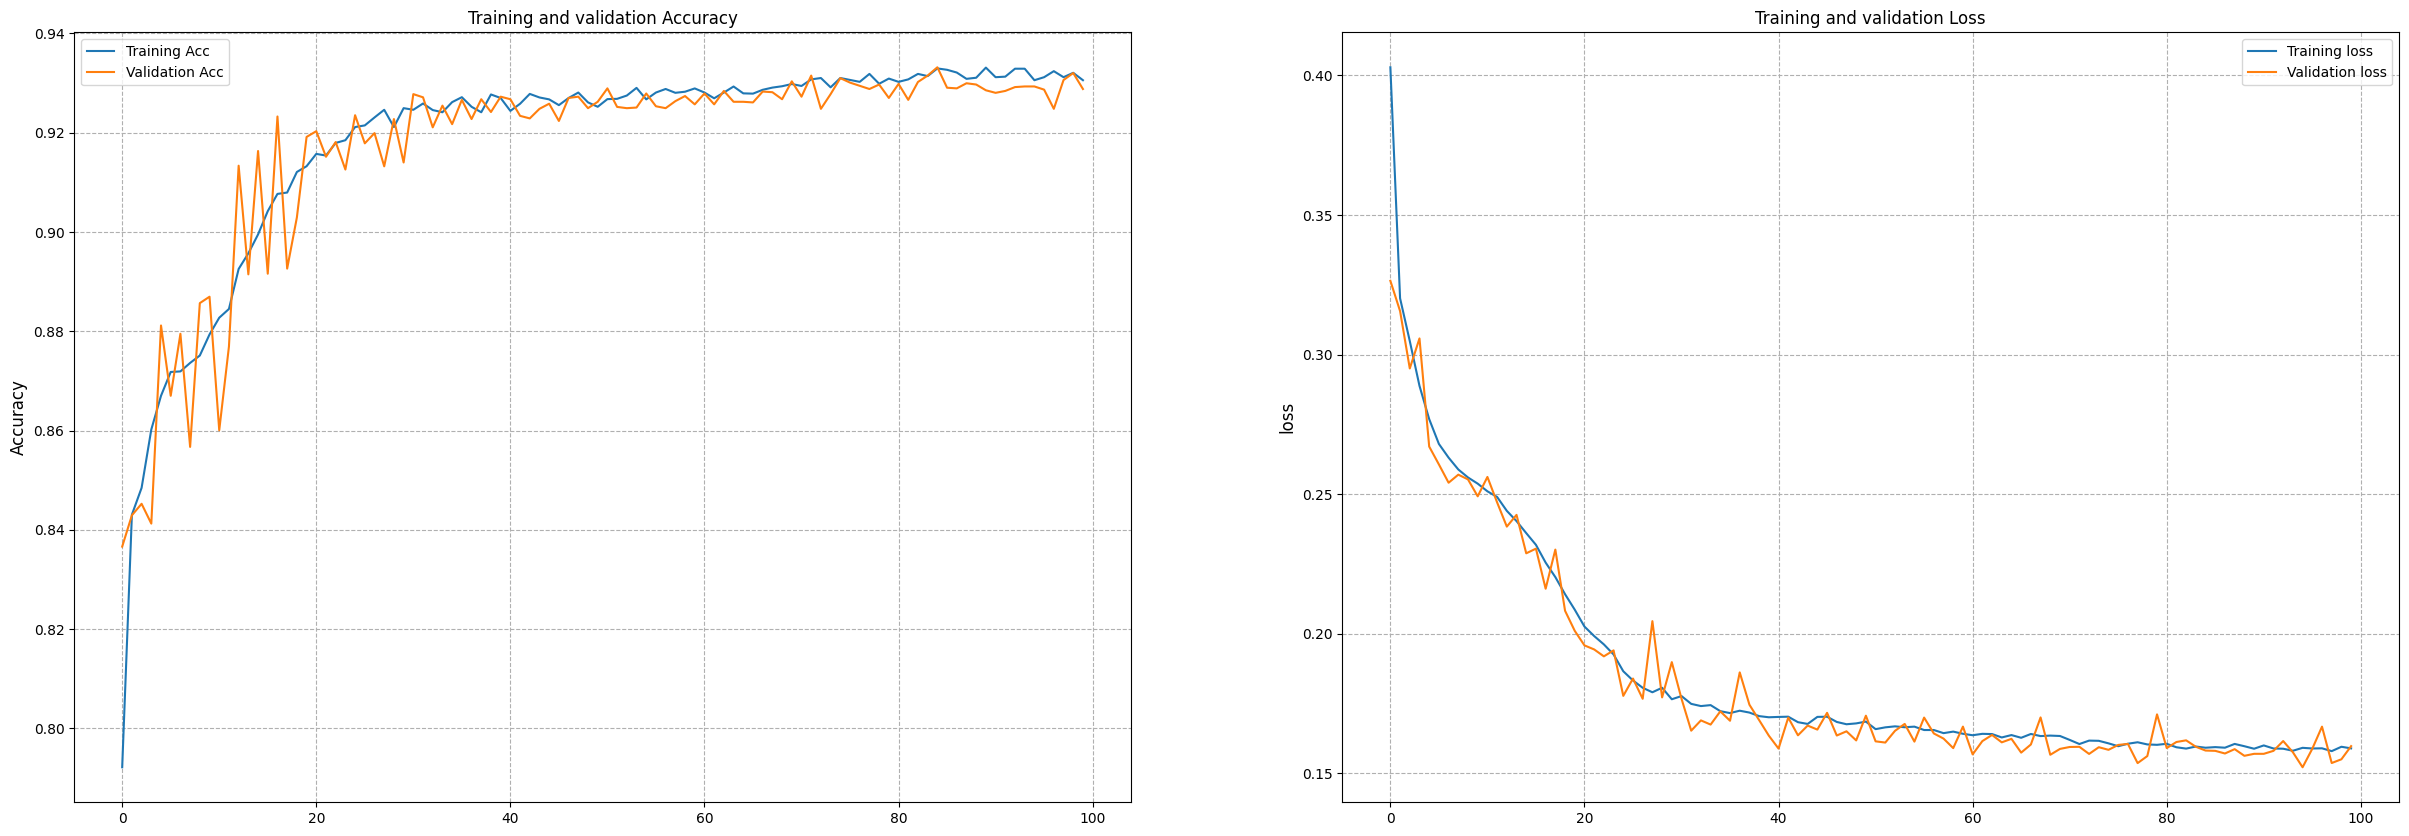

In [52]:
# visualisasi hasil training pada data train & validasi (accuracy & loss)

fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_func.history['accuracy'], label='Training Acc')
plt.plot(history_ann_func.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_func.history['loss'], label='Training loss')
plt.plot(history_ann_func.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

- Tidak overfitting karena grafik data train dan validation membentuk jarak yang kecil
- tidak terjadi vanishing pada model
- terlihat ada explode tetapi jika kita perhatikan skala nilai akurasinya maka bisa dikatakan kecil

In [53]:
test_results= model_func.evaluate(x_test_final,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

347/347 [==============================] - 1s 1ms/step - loss: 0.1697 - accuracy: 0.9293
Test loss: 0.1697
Test Accuracy: 0.9293


## Model Improvement

### 1. Sequential API

In [54]:
# membuat arsitektur model sequential dengan improvement

hidden_units1 = 50
hidden_units2 = 50
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu', name='hidden_layer_1'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='sigmoid')])
  return model

ann2 = build_model_using_sequential()

In [55]:
ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- improvement dibuat dengan menambahkan jumlah hidden layer dan menambah jumlah neuron menjadi 50. Menetapkan learning rate=0.01. Ditambahkan Dropout dengan nilai 0.2 untuk mengatasi explode. Menambahkan kernel_initializer= normal

In [70]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 50)                650       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,251
Trainable params: 3,251
Non-trainable params: 0
_________________________________________________________________


In [57]:
# melakukan training pada model hasil improvement

batch=32

history_ann2_seq= ann2.fit(training_batches,
                         validation_data= (validation_batches),
                         batch_size= batch,
                         epochs= 100
                         )

Epoch 1/100
567/567 [==============================] - 3s 3ms/step - loss: 0.4256 - accuracy: 0.7885 - val_loss: 0.3551 - val_accuracy: 0.7814
Epoch 2/100
567/567 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8200 - val_loss: 0.3273 - val_accuracy: 0.8375
Epoch 3/100
567/567 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8369 - val_loss: 0.3200 - val_accuracy: 0.8394
Epoch 4/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3191 - accuracy: 0.8445 - val_loss: 0.2990 - val_accuracy: 0.8437
Epoch 5/100
567/567 [==============================] - 2s 4ms/step - loss: 0.3034 - accuracy: 0.8651 - val_loss: 0.2804 - val_accuracy: 0.8661
Epoch 6/100
567/567 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.8903 - val_loss: 0.2558 - val_accuracy: 0.9130
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.9017 - val_loss: 0.2355 - val_accuracy: 0.9171

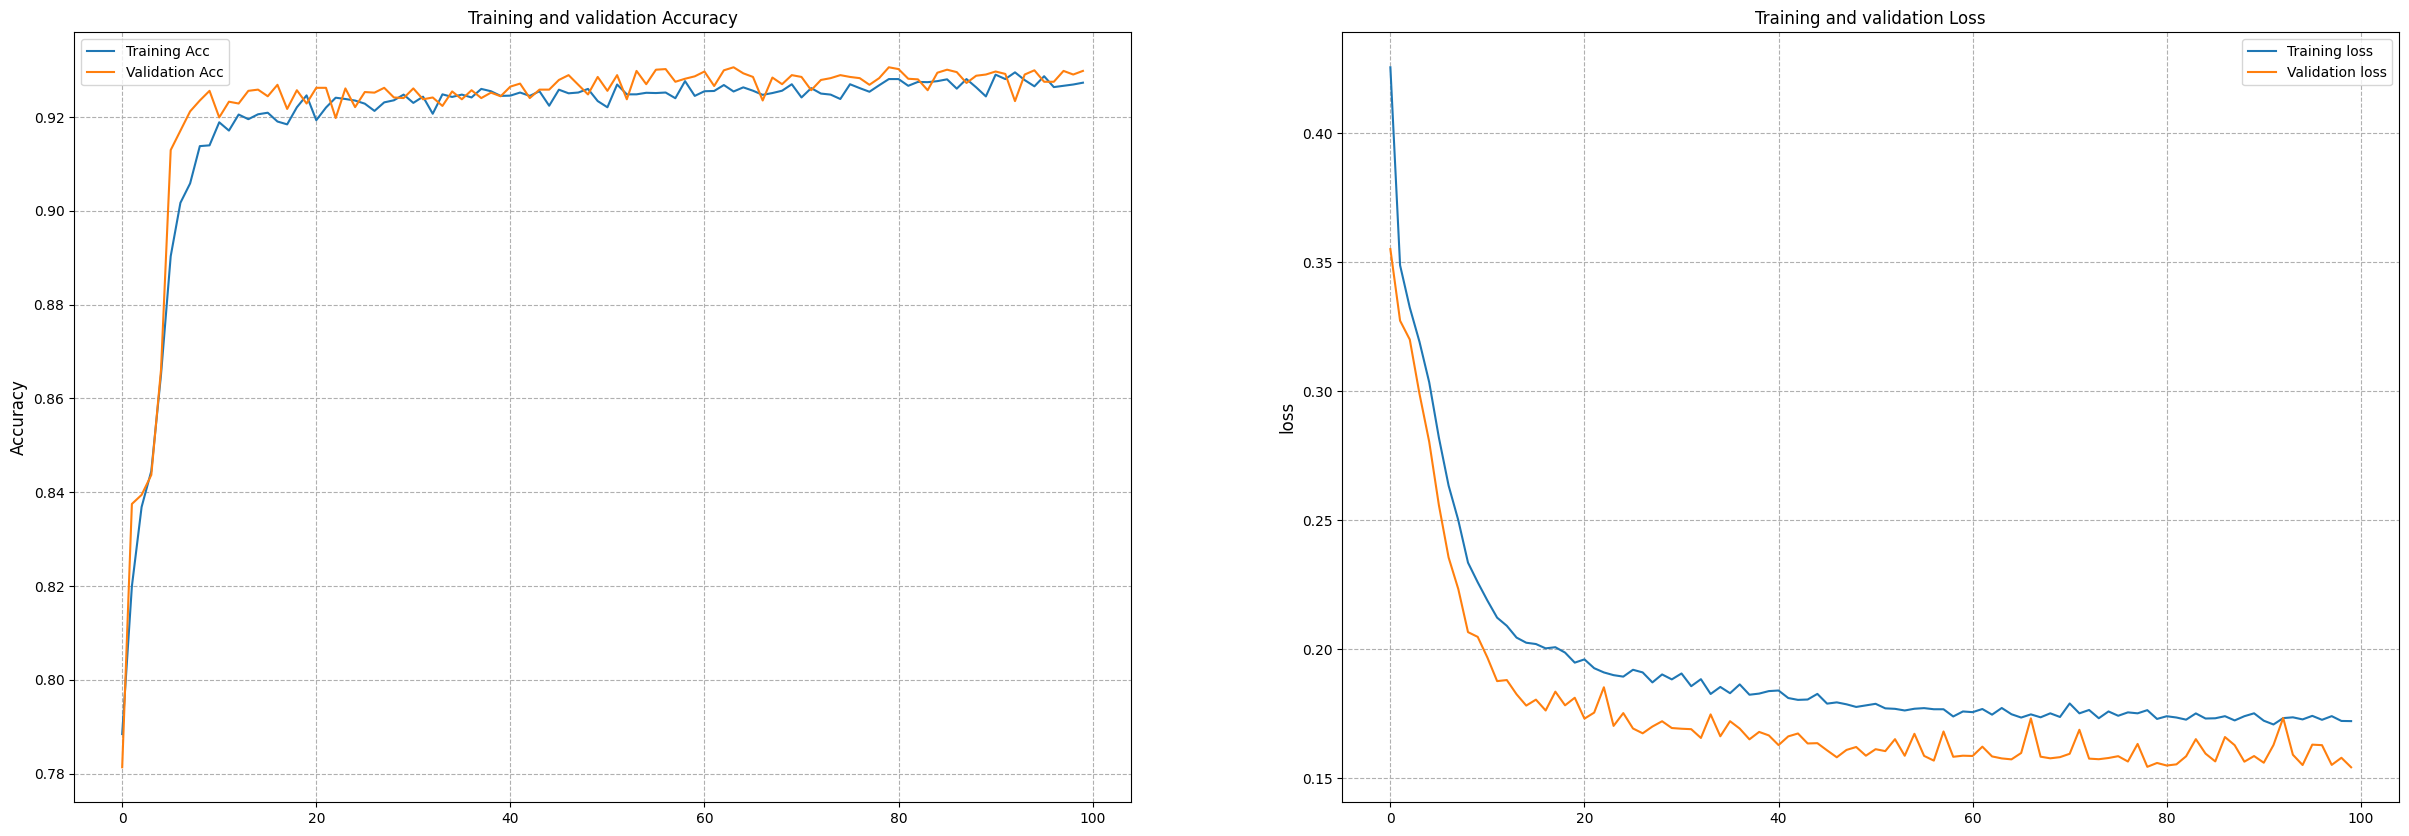

In [58]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann2_seq.history['accuracy'], label='Training Acc')
plt.plot(history_ann2_seq.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann2_seq.history['loss'], label='Training loss')
plt.plot(history_ann2_seq.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

- Tidak overfitting karena nilai val accuracy di atas nilai train acc, nilai val loss di bawah train loss

- tidak ada vanishing dan explode

In [59]:
test_results= ann2.evaluate(x_test_final,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

347/347 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9274
Test loss: 0.1652
Test Accuracy: 0.9274


### 2. Functional API

In [60]:
# membuat arsitektur model fuctional dengan improvement

input_layer= tf.keras.Input(shape=(x_train_final.shape[1:]),name='input_layer')

hidden_1= Dense(50, activation='relu', name='hidden_1')(input_layer)
dropout_layer1 = Dropout(0.5)(hidden_1)
hidden_2= Dense(30, activation='relu', name='hidden_2')(dropout_layer1)
dropout_layer2 = Dropout(0.5)(hidden_2)
hidden_3= Dense(10, activation='relu', name='hidden_3')(dropout_layer2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func2= Model(inputs=input_layer,
                  outputs=output_layer)

model_func2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Improvement dilakukan dengan menambah jumlah neuron di hidden layer1. Menetapkan nilai Dropout=0.5

In [71]:
model_func2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 12)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 50)           650         ['input_layer[0][0]']            
                                                                                                  
 dropout_2 (Dropout)            (None, 50)           0           ['hidden_1[0][0]']               
                                                                                                  
 hidden_2 (Dense)               (None, 30)           1530        ['dropout_2[0][0]']              
                                                                                            

In [61]:
# melakukan training pada model functional hasil improvement

batch=32

history_ann_func= model_func2.fit(training_batches,
                        validation_data= (validation_batches),
                         batch_size= batch,
                         epochs= 100,
                         #callbacks= callbacks2
                         )

Epoch 1/100
567/567 [==============================] - 3s 3ms/step - loss: 0.4632 - accuracy: 0.7833 - val_loss: 0.3643 - val_accuracy: 0.8440
Epoch 2/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3699 - accuracy: 0.8359 - val_loss: 0.3407 - val_accuracy: 0.8415
Epoch 3/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8399 - val_loss: 0.3270 - val_accuracy: 0.8456
Epoch 4/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3378 - accuracy: 0.8442 - val_loss: 0.3192 - val_accuracy: 0.8495
Epoch 5/100
567/567 [==============================] - 2s 4ms/step - loss: 0.3267 - accuracy: 0.8462 - val_loss: 0.3041 - val_accuracy: 0.8499
Epoch 6/100
567/567 [==============================] - 2s 3ms/step - loss: 0.3142 - accuracy: 0.8494 - val_loss: 0.2882 - val_accuracy: 0.8616
Epoch 7/100
567/567 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8519 - val_loss: 0.2852 - val_accuracy: 0.8790

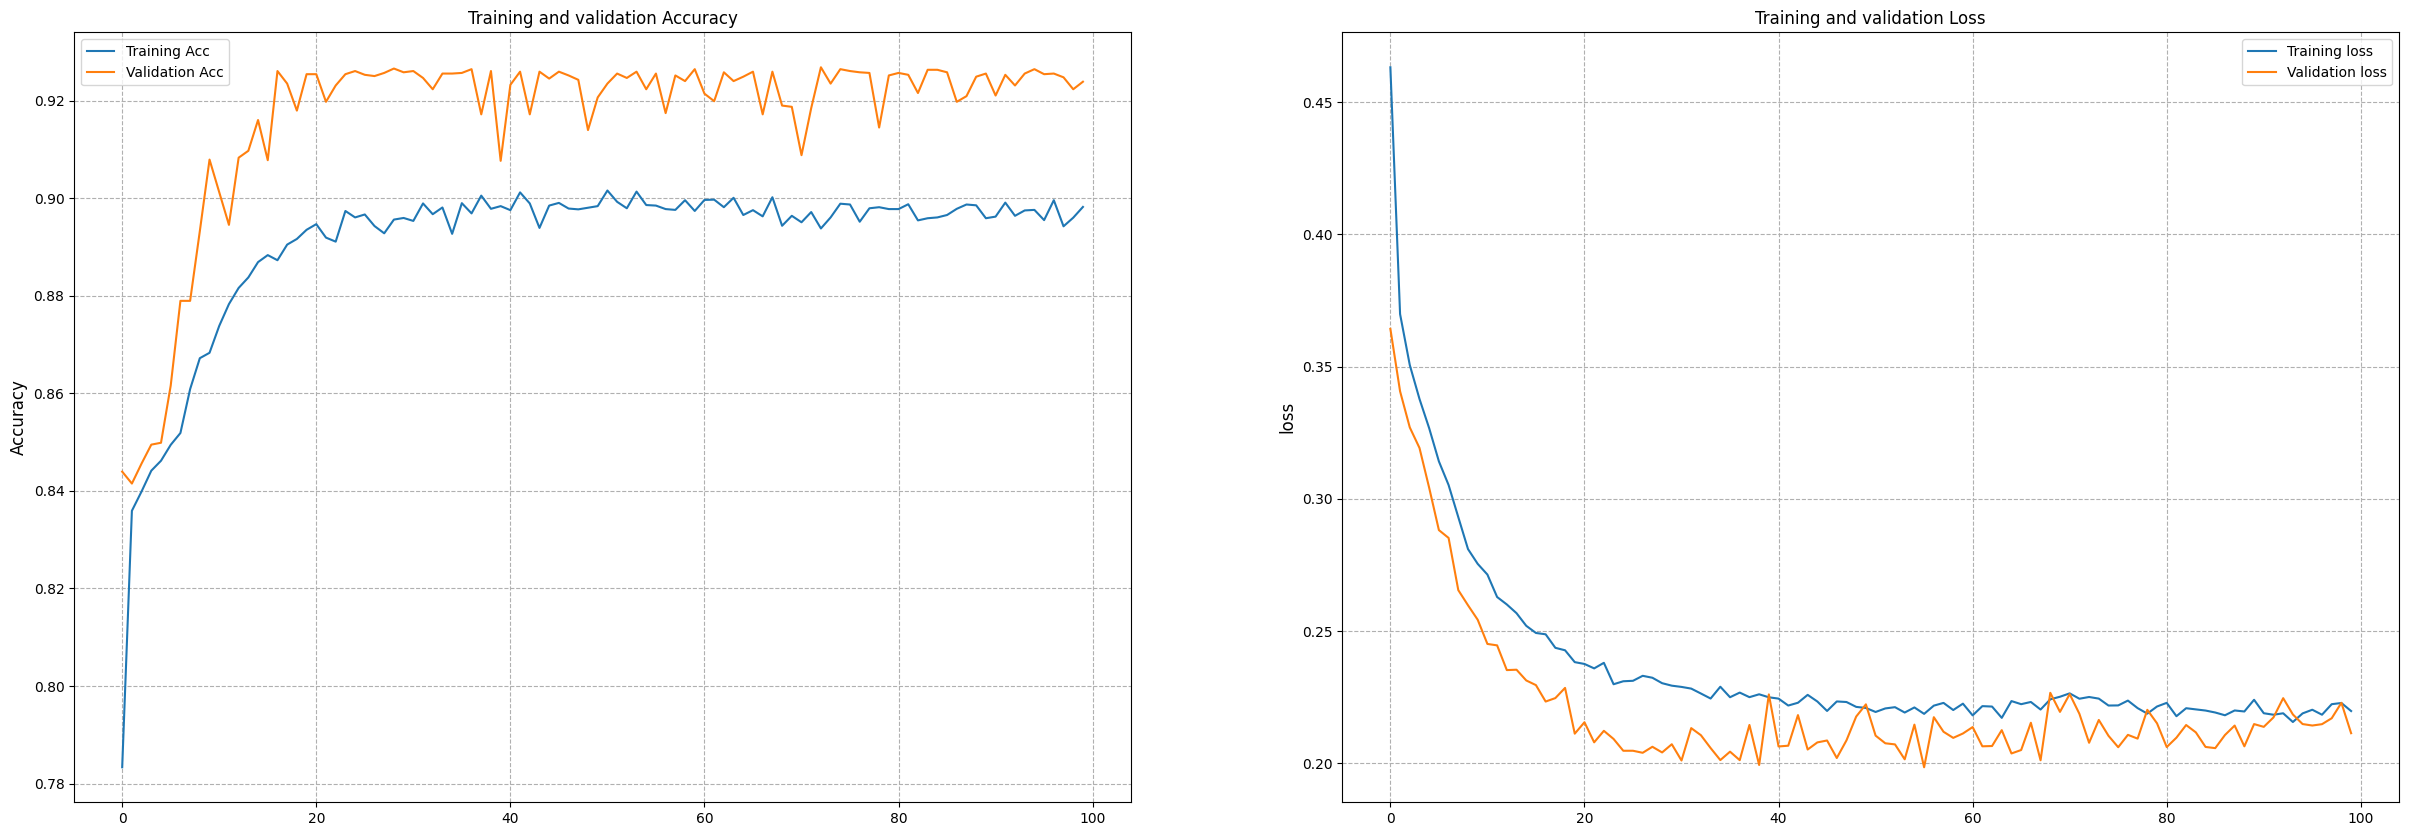

In [62]:
fig,ax= plt.subplots(1,2 , figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Training and validation Accuracy', fontsize=12)
plt.plot(history_ann_func.history['accuracy'], label='Training Acc')
plt.plot(history_ann_func.history['val_accuracy'], label='Validation Acc')
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title('Training and validation Loss', fontsize=12)
plt.plot(history_ann_func.history['loss'], label='Training loss')
plt.plot(history_ann_func.history['val_loss'], label='Validation loss')
plt.ylabel('loss', fontsize=12)
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [63]:
test_results= model_func2.evaluate(x_test_final,y_test, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

347/347 [==============================] - 1s 2ms/step - loss: 0.2125 - accuracy: 0.9244
Test loss: 0.2125
Test Accuracy: 0.9244


- Tidak overfitting karena nilai val accuracy di atas nilai train acc, nilai val loss di bawah train loss

- tidak ada vanishing. ada explode tapi kecil

## Model Saving

Berdasarkan perbandingkan hasil improvement antara sequential dan functional maka best model yang akan disimpan untuk model inference adalah sequential dengan accuracy = 0.9274 dan loss = 0.1652

In [64]:
import joblib

In [65]:
with open("prepro.pkl", "wb") as file1:
    joblib.dump(preprocess_pipe, file1)

In [67]:
ann2.save('ann_churn.h5')

## Model Inference

`Model inference dibuat di notebook terpisah dengan nama file model_inf.ipynb`

## Conclusions

Seiring dengan meningkatnya pengakses internet di masyarakat, semakin banyak sektor kehidupan yang merambah ke dunia online. Tidak terkecuali sektor perdagangan atau jual beli. Ini bisa dibuktikan dengan tumbuh pesatnya situs-situs jual beli saat ini. Jumlah situs jual beli yang begitu banyak dan saling berkompetisi satu sama lain membuat setiap perusahaan pemilik situs berusaha untuk menjaga loyalitas customer nya. Keadaan di mana seorang customer berhenti menggunakan suatu jasa suatu perusahaan disebut churn.

Dataset yang akan dianalisis adalah data customer yang mulai membuat akun di sebuah situs jual beli dari tahun 2015-2017. Data berisi kolom yang menerangkan umur, gender, domisili, jenis membership, tanggal pembuatan akun, preferensi tawaran, jenis perangkat yang digunakan untuk mengakses web, waktu terakhir akses web, jumlah poin reward, status komplain, feedback, dan kondisi churn atau tidak.

Dari dataset tersebut dibuat model yang akan memprediksi di masa yang akan datang apakah seorang customer menjadi churn atau tidak. Artificial neural network dimanfaatkan untuk membuat model tersebut. Dibuat 2 model yaitu sequential API dan functional API, lalu hasilnya dibandingkan. Selanjutnya dilakukan model improvement. Hasil model improvement terbaiklah yang akan digunakan perusahaan untuk memprediksi status churn di masa yang akan datang.

Dari hasil permodelan didapatkan model sequential hasil improvement sebagai model dengan performa terbaik dimana menghasilkan nilai accuracy 0.9274 dan nilai loss 0.1652. Jika melihat hasil plotting terlihat model tidak overfitting. Improvement masih dapat dilakukan dengan melakukan tuning dengan mencoba berbagai macam parameter seperti initializer, mengganti optimizer, dll.

Selain pembuatan model kita juga perlu menganalisa data secara umum. Dari hasil analisa eksplorasi data, mayoritas customer churn tidak menjadi member atau jika menjadi member mereka hanya basic membership, keduanya adalah tingkat member paling rendah. Terlihat juga masih banyaknya customer yang tidak menjadi member secara umum. Rekomendasi untuk tim marketing adalah meningkatkan offering membership pada customer dan membuat paket benefit yang lebih menarik supaya customer ikut membership yang lebih tinggi.

Selain itu kita juga meninjau tentang feedback customer. Dari hasil analisa, seluruh customer churn memberikan feedback yang negatif. Maka untuk meminimalisir churn, kita harus menekan jumlah feedback negatif. Dari feedback negatif customer churn ada 2 feedback yang berkaitan dengan website yaitu terlalu banyak iklan yang muncul ketika akses website dan kualitas website dianggap buruk. Maka tim front end perlu mengevaluasi kualitas website perusahaan.

Salah satu yang bisa menyebabkan feedback negatif adalah komplain customer. Berdasarkan data, masih banyak status komplain yang tidak ada informasi penyelesaiannya. Tim customer service perlu memastikan terselesaikannya komplain customer agar tidak menjadi feedback negatif karena jika kita kembali melihat feedback customer churn, salah satu feedback negatif yang berjumlah banyak adalah customer merasa kualitas customer service buruk.

Salah satu cara yang diharapkan untuk menjaga loyalitas customer adalah pemberian tawaran diskon khusus. Tapi berdasarkan data ternyata strategi tersebut tidak berjalan efektif. Terbukti dengan banyaknya customer churn yang juga menggunakan tawaran diskon khusus tersebut.

Selain menekan jumlah churn, kita juga bisa meningkatkan penambahan jumlah user baru. Kita bisa mempertimbangkan untuk membuat aplikasi mobile selain hanya mengandalkan website. Karena mayoritas customer bisa mengakses website dengan perangkat smartphone. Diharapkan aplikasi mobile dapat menjangkau customer lebih dekat dan lebih mudah diakses.






